---
title: "Example Notebooks of Poincare Map" \
author: "Naoya Ozaki" \
date: "04 January 2024" \
output: "poincare_map"

---

In [13]:
using LinearAlgebra

# Definition of Equation of Motion of Planar CRTBP
function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0]
    r2 = x[1:2] - [1 - μ, 0]
    a_cori = [2x[4], -2x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

eom_pcrtbp! (generic function with 1 method)

In [14]:
function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0]
    return r1_vec ⋅ x[3:4]
end

function affect!(integrator)
    nothing
end

affect! (generic function with 1 method)

In [15]:
using DifferentialEquations
cb = ContinuousCallback(condition, nothing, affect!, save_positions=(true, false))

jacobi_constant = 3.0
μ = 5.667e-5 #0.01215058426994
qx0 = 1.03+2.5e-3 # 1.03 + 5.0e-3*random()
py0 = sqrt(-jacobi_constant + qx0^2 + 2 * (1 - μ) / abs(qx0 + μ) + 2 * μ / abs(qx0 -1 + μ) + μ*(1-μ))
x0 = [qx0, 0, 0, py0]
tspan = (0.0, 1000000.0)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)
sol = solve(prob, Vern7(), callback=cb, saveat=1000000)

retcode: Success
Interpolation: 1st order linear
t: 87363-element Vector{Float64}:
      0.0
      5.263907496421901
     15.685692663887778
     26.10695761525249
     36.44844845726533
     46.70528662158592
     56.95993662638934
     67.2075122137628
     77.45456138556764
     87.70183859186056
      ⋮
 999908.7375683658
 999920.377218693
 999931.9694659252
 999943.5734621801
 999955.2031836641
 999966.7891906984
 999978.4102996245
 999990.0662168221
      1.0e6
u: 87363-element Vector{Vector{Float64}}:
 [1.0325, 0.0, 0.0, 0.08015084701085812]
 [-0.8276626603348961, -1.5584412876126428, -0.9863422270389804, 0.5237943463806753]
 [1.7589503021828603, 0.15113037073364666, 0.0956955583989905, -1.113800976028964]
 [-1.0816205969732673, 1.3941317646286622, 0.8823115303552779, 0.6844950727014147]
 [-0.427774983230542, -1.6822854362406865, -1.0462034920600825, 0.2659955220915429]
 [1.5318203687945948, 0.8178348536778647, 0.508798526248224, -0.9530246555610666]
 [-1.63614140657218, 0.57986

In [16]:
x_all = hcat(sol.u...)'

r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
a = -0.5 ./ (k_ene .- 1 ./ r_1)
theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)
# v_r = x_all[:, 3].*cos.(theta) + x_all[:,4].*sin.(theta)
# v_t = r_1 - x_all[:, 3] .* sin.(theta) + x_all[:, 4] .* cos.(theta)
# a = (r_1.*(1-μ))./(2*(1-μ) .- r_1.*(v_r.^2+v_t.^2))

87363-element Vector{Float64}:
  0.0
 -2.0589721563335686
  0.08570752416796058
  2.230604440854459
 -1.8197694322335995
  0.4903809760018597
  2.800982166734949
 -1.1653148071933088
  1.155001286132675
 -2.810994997463216
  ⋮
 -3.0256212269260203
 -2.085372543470074
 -1.123285193114291
 -0.16673756020135333
  0.7776539472426006
  1.742618491783448
  2.691391796734572
 -2.659050372139081
 -0.9095428019951969

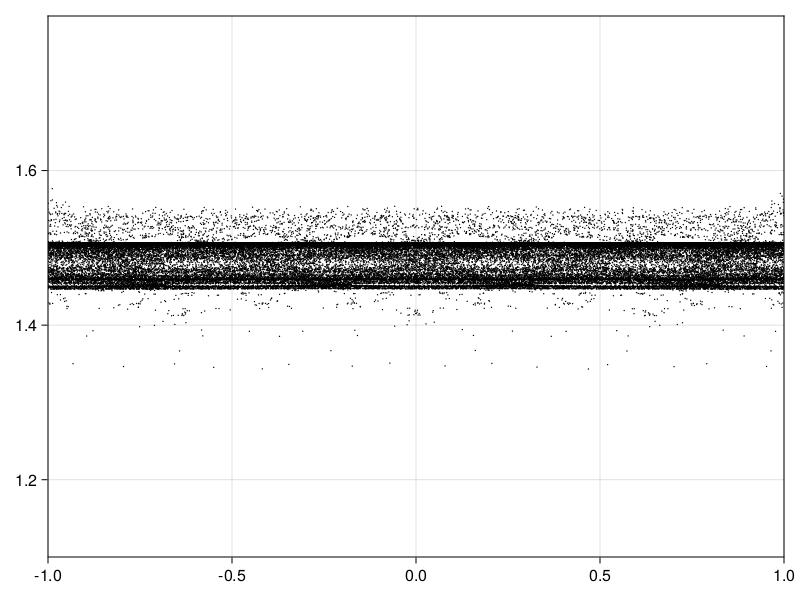

In [17]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1])
scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=2)
xlims!(-1, 1)
ylims!(1.1, 1.8)
# ylims!(0.4, 0.65)
fig